In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
d.keys()

dict_keys(['Resources', 'TomQuality', 'CropParameters', 'LabAnalysis', 'Production', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
greenhouseclimate=d['GreenhouseClimate']

In [5]:
greenhouseclimate.shape

(286854, 50)

In [6]:
greenhouseclimate.dtypes

%time                          float64
AssimLight                      object
BlackScr                        object
CO2air                          object
Cum_irr                         object
EC_drain_PC                     object
EnScr                           object
HumDef                          object
PipeGrow                        object
PipeLow                         object
Rhair                           object
Tair                            object
Tot_PAR                         object
Tot_PAR_Lamps                    int64
VentLee                         object
Ventwind                        object
assim_sp                        object
assim_vip                       object
co2_dos                         object
co2_sp                          object
co2_vip                         object
dx_sp                           object
dx_vip                          object
int_blue_sp                     object
int_blue_vip                    object
int_farred_sp            

In [7]:
for col in greenhouseclimate.columns:
    greenhouseclimate[col] = greenhouseclimate[col].astype(float)

In [8]:
greenhouseclimate.nunique()

%time                          47809
AssimLight                         3
BlackScr                         101
CO2air                          1248
Cum_irr                          262
EC_drain_PC                      110
EnScr                            101
HumDef                           240
PipeGrow                         509
PipeLow                          562
Rhair                            664
Tair                             265
Tot_PAR                         1007
Tot_PAR_Lamps                     98
VentLee                          101
Ventwind                         101
assim_sp                          17
assim_vip                         55
co2_dos                          192
co2_sp                          1083
co2_vip                         1089
dx_sp                            127
dx_vip                           121
int_blue_sp                      170
int_blue_vip                     234
int_farred_sp                      9
int_farred_vip                    15
i

In [9]:
#View the data
greenhouseclimate.head()

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,43815.00000,0.0,35.0,439.0,0.5,3.6,96.0,7.0,0.0,50.9,...,NaN,0.0,NaN,25.0,26.0,4.0,NaN,1000.0,NaN,1.2
1,43815.00347,0.0,85.0,459.0,0.7,3.6,96.0,7.4,0.0,49.3,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
2,43815.00694,0.0,96.0,461.0,0.7,3.6,95.0,6.0,0.0,47.6,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
3,43815.01042,0.0,92.0,465.0,0.7,3.6,95.0,6.6,0.0,46.1,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2
4,43815.01389,0.0,92.0,467.0,0.7,3.6,95.0,7.0,0.0,45.2,...,NaN,0.0,NaN,25.0,26.0,6.0,NaN,1000.0,NaN,1.2


In [10]:
greenhouseclimate.columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip',
       't_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip',
       't_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip'],
      dtype='object')

In [11]:
#Basic information
greenhouseclimate.info()
#Describe the data
greenhouseclimate.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286854 entries, 0 to 286853
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   %time                        286854 non-null  float64
 1   AssimLight                   286428 non-null  float64
 2   BlackScr                     286428 non-null  float64
 3   CO2air                       286428 non-null  float64
 4   Cum_irr                      286428 non-null  float64
 5   EC_drain_PC                  286437 non-null  float64
 6   EnScr                        286428 non-null  float64
 7   HumDef                       286428 non-null  float64
 8   PipeGrow                     286428 non-null  float64
 9   PipeLow                      286428 non-null  float64
 10  Rhair                        286428 non-null  float64
 11  Tair                         286428 non-null  float64
 12  Tot_PAR                      286428 non-null  float64
 13 

,%time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
count,286854.000000,286428.000000,286428.000000,286428.000000,286428.000000,286437.000000,286428.000000,286428.000000,286428.000000,286428.000000,...,189199.000000,286428.000000,241240.000000,286428.000000,286428.000000,286428.000000,198565.000000,286428.000000,233625.000000,286428.000000
mean,43898.000000,52.786040,41.574637,681.910623,2.533360,5.723784,27.067783,3.561552,13.096515,17.878448,...,9.378343,6.190992,23.623814,23.715696,24.052344,23.105636,937.608436,762.343545,2.187406,2.012144
std,47.921158,49.921882,45.849782,165.918040,2.508044,1.646544,41.600828,2.645390,17.947345,20.970103,...,14.597453,12.668411,4.806905,4.748899,4.759846,24.089622,817.620267,789.506747,6.111766,5.556125
min,43815.000000,0.000000,0.000000,-499.000000,0.000000,0.100000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43856.500000,0.000000,0.000000,559.000000,0.500000,5.000000,0.000000,1.800000,0.000000,0.000000,...,0.000000,0.000000,20.000000,20.000000,20.300000,4.000000,60.000000,55.000000,0.000000,0.000000
50%,43898.000000,100.000000,0.000000,651.000000,1.900000,5.600000,0.000000,2.700000,0.000000,0.000000,...,0.000000,0.000000,22.800000,23.000000,23.300000,18.000000,999.000000,120.000000,0.000000,1.000000
75%,43939.500000,100.000000,92.000000,799.000000,3.900000,6.400000,77.000000,4.400000,33.400000,37.100000,...,26.000000,0.000000,26.800000,27.000000,28.000000,36.000000,1950.000000,1440.000000,2.000000,2.000000
max,43981.000000,100.000000,100.000000,2000.000000,65.100000,11.700000,100.000000,32.100000,76.400000,73.600000,...,60.000000,60.000000,37.500000,37.500000,37.500000,751.000000,2000.000000,2000.000000,100.000000,100.000000


In [12]:
#Find the duplicates
greenhouseclimate.duplicated().sum()

5

In [13]:
#Find NaN values
greenhouseclimate.isna().sum()

%time                               0
AssimLight                        426
BlackScr                          426
CO2air                            426
Cum_irr                           426
EC_drain_PC                       417
EnScr                             426
HumDef                            426
PipeGrow                          426
PipeLow                           426
Rhair                             426
Tair                              426
Tot_PAR                           426
Tot_PAR_Lamps                       0
VentLee                           426
Ventwind                          426
assim_sp                        53278
assim_vip                         426
co2_dos                            12
co2_sp                          47002
co2_vip                           426
dx_sp                           53006
dx_vip                            426
int_blue_sp                      1593
int_blue_vip                   134546
int_farred_sp                    1250
int_farred_v

In [14]:
#Replacing Nan values with mean of their respective columns
imputer = SimpleImputer(strategy = "mean")
cn= greenhouseclimate.columns
values =greenhouseclimate.values
df = imputer.fit_transform(values)
greenhouseclimate = pd.DataFrame(df, columns = cn)

In [15]:
#renaming
greenhouseclimate.rename(columns={'%time': 'Time'}, inplace=True)
greenhouseclimate.head()

,Time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,43815.00000,0.0,35.0,439.0,0.5,3.6,96.0,7.0,0.0,50.9,...,9.378343,0.0,23.623814,25.0,26.0,4.0,937.608436,1000.0,2.187406,1.2
1,43815.00347,0.0,85.0,459.0,0.7,3.6,96.0,7.4,0.0,49.3,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
2,43815.00694,0.0,96.0,461.0,0.7,3.6,95.0,6.0,0.0,47.6,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
3,43815.01042,0.0,92.0,465.0,0.7,3.6,95.0,6.6,0.0,46.1,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
4,43815.01389,0.0,92.0,467.0,0.7,3.6,95.0,7.0,0.0,45.2,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2


In [16]:
#changing time format
greenhouseclimate['Time'] = pd.to_datetime(greenhouseclimate['Time'], unit='D', origin='1899-12-30')

In [17]:
greenhouseclimate.head()

,Time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,2019-12-16 00:00:00.000000000,0.0,35.0,439.0,0.5,3.6,96.0,7.0,0.0,50.9,...,9.378343,0.0,23.623814,25.0,26.0,4.0,937.608436,1000.0,2.187406,1.2
1,2019-12-16 00:04:59.808000256,0.0,85.0,459.0,0.7,3.6,96.0,7.4,0.0,49.3,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
2,2019-12-16 00:09:59.616000000,0.0,96.0,461.0,0.7,3.6,95.0,6.0,0.0,47.6,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
3,2019-12-16 00:15:00.288000000,0.0,92.0,465.0,0.7,3.6,95.0,6.6,0.0,46.1,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2
4,2019-12-16 00:20:00.096000256,0.0,92.0,467.0,0.7,3.6,95.0,7.0,0.0,45.2,...,9.378343,0.0,23.623814,25.0,26.0,6.0,937.608436,1000.0,2.187406,1.2


<ipython-input-18-61a92a5c7dc1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(greenhouseclimate.corr(), annot=True)


<AxesSubplot:>

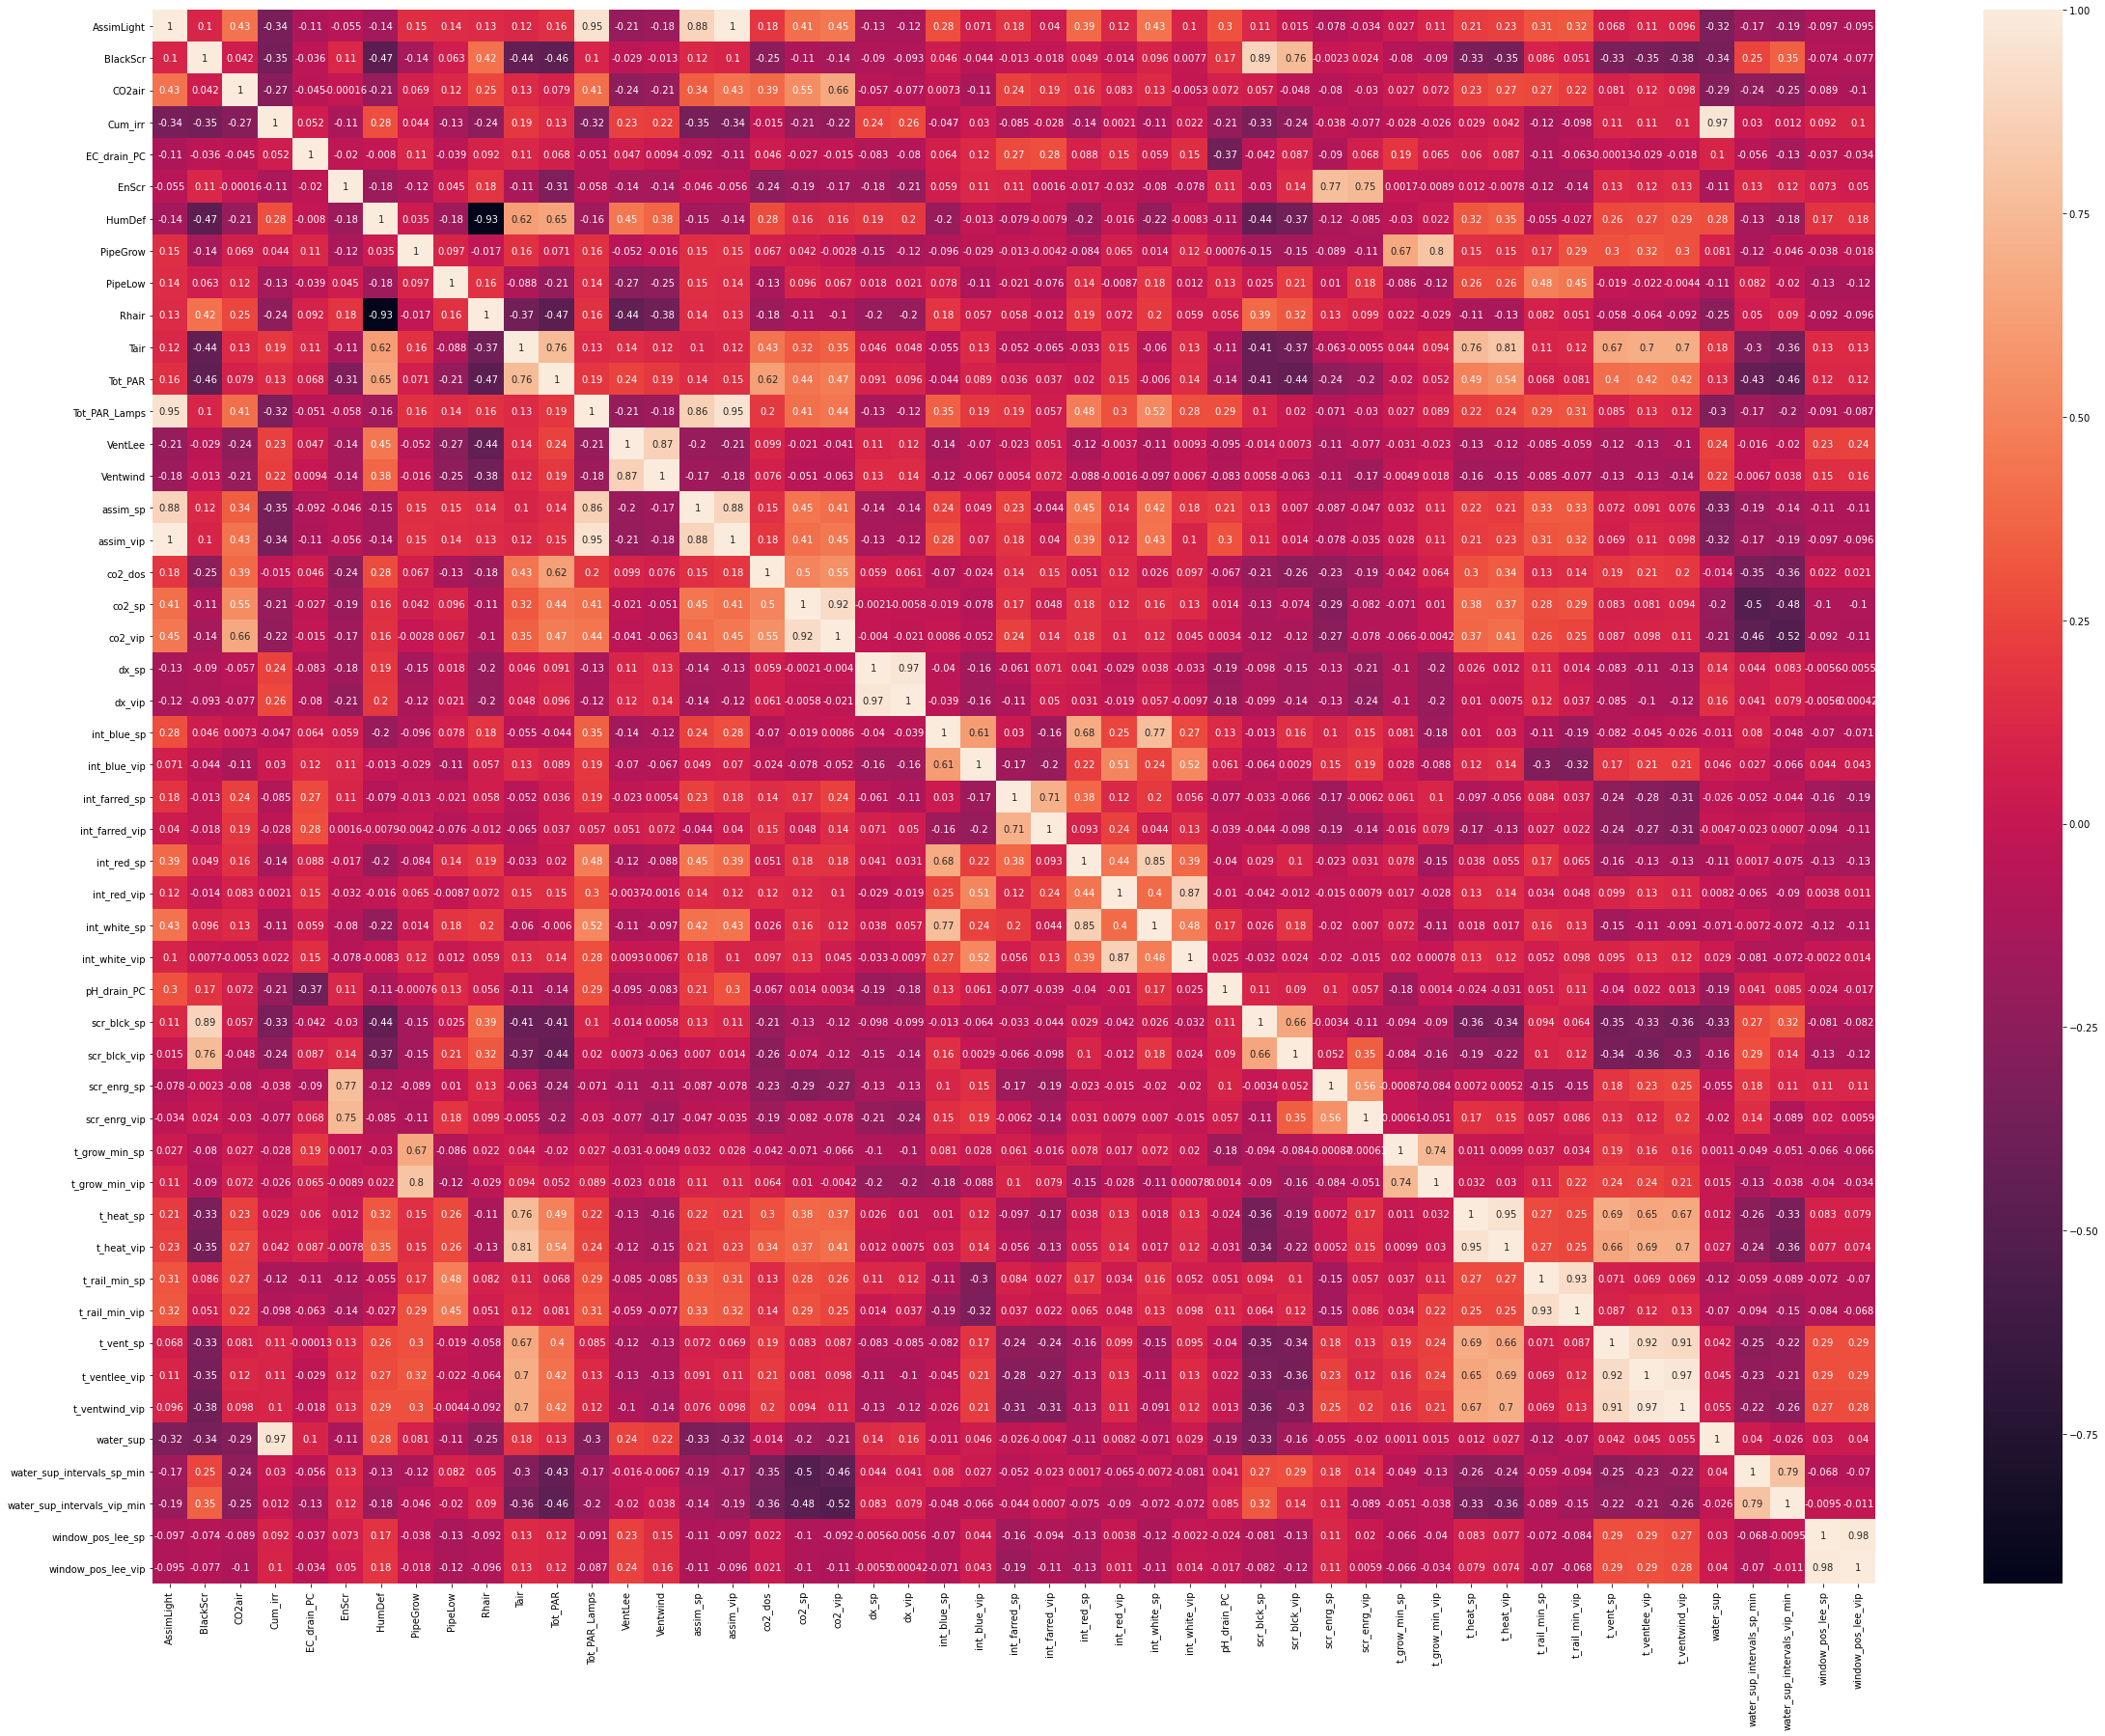

In [18]:
#correlation
plt.figure(figsize=(40,30))
sns.heatmap(greenhouseclimate.corr(), annot=True)

In [19]:
correlations = greenhouseclimate.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

<ipython-input-19-922aea1ec411>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = greenhouseclimate.corr()


AssimLight and Tot_PAR_Lamps correlated with value 0.9517708459475069
AssimLight and assim_sp correlated with value 0.8837042219212763
AssimLight and assim_vip correlated with value 0.9957920931616616
BlackScr and scr_blck_sp correlated with value 0.8852907487735588
BlackScr and scr_blck_vip correlated with value 0.7567045186217474
CO2air and co2_vip correlated with value 0.6611666706885859
Cum_irr and water_sup correlated with value 0.9673946592998961
EnScr and scr_enrg_sp correlated with value 0.7679846690027841
EnScr and scr_enrg_vip correlated with value 0.7468556960886117
HumDef and Rhair correlated with value -0.9340363064109228
HumDef and Tair correlated with value 0.6185249284205722
HumDef and Tot_PAR correlated with value 0.6471488186143782
PipeGrow and t_grow_min_sp correlated with value 0.668180362420415
PipeGrow and t_grow_min_vip correlated with value 0.7981105954294395
Rhair and HumDef correlated with value -0.9340363064109228
Tair and HumDef correlated with value 0.61852

C:\Users\singh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


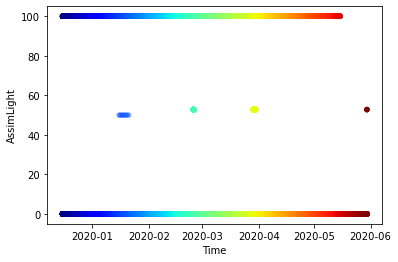

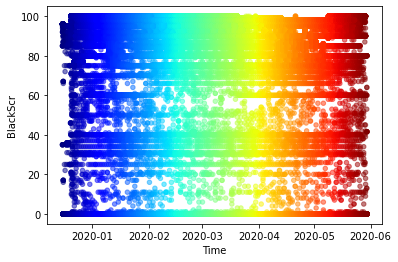

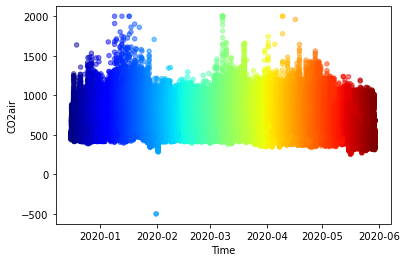

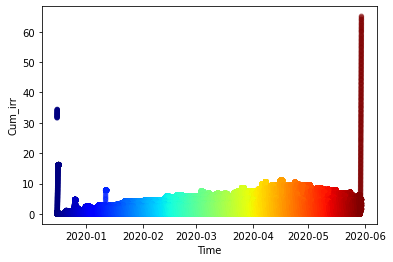

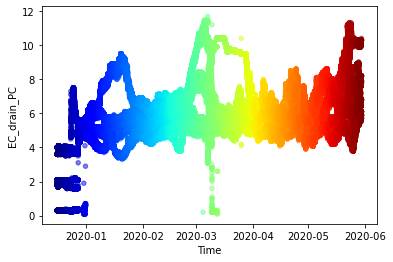

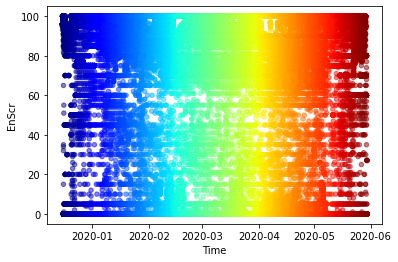

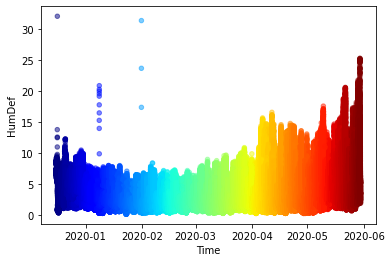

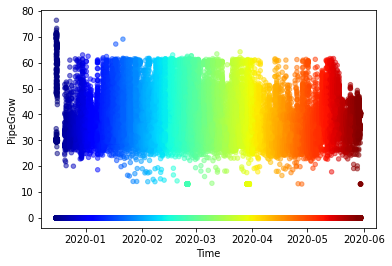

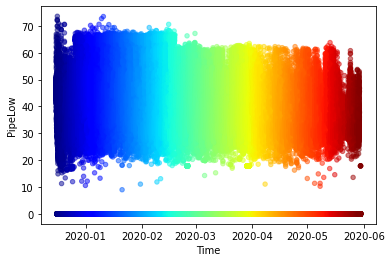

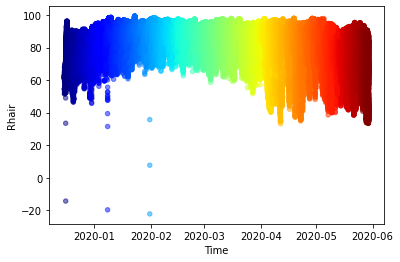

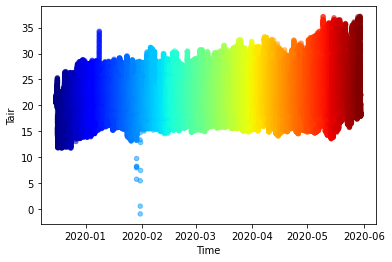

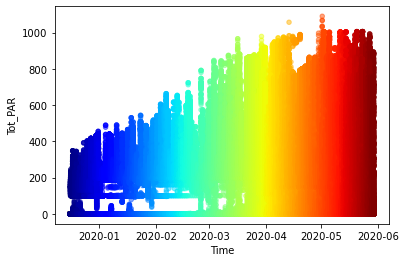

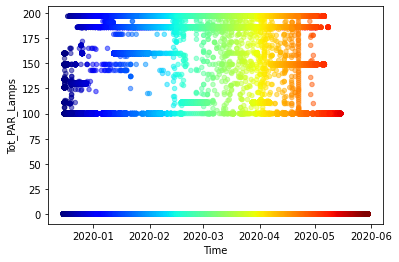

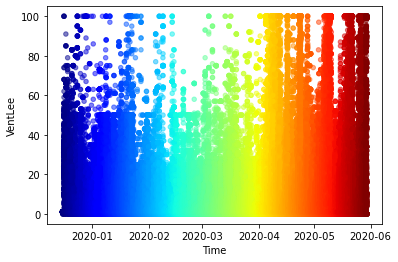

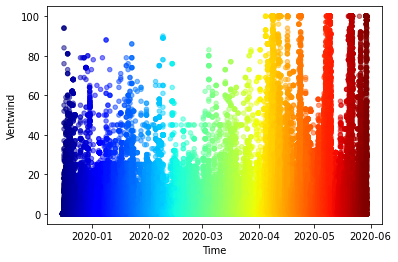

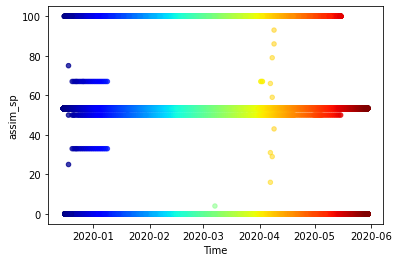

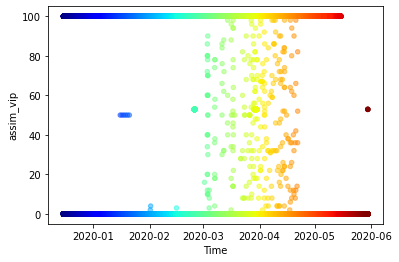

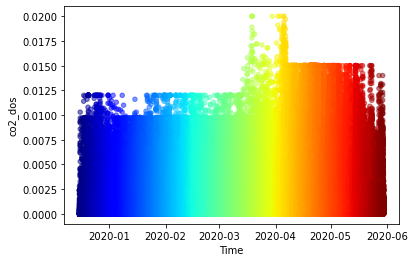

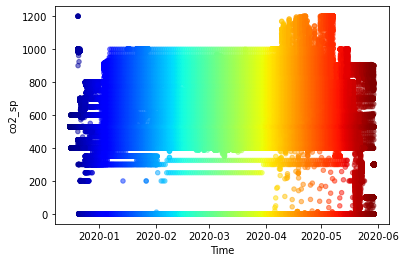

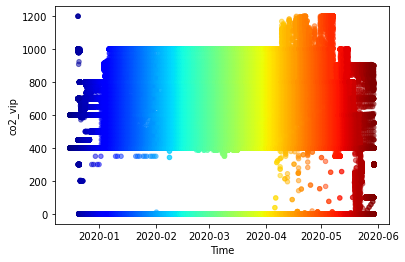

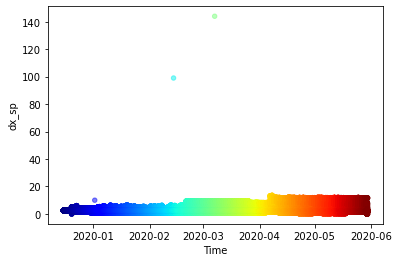

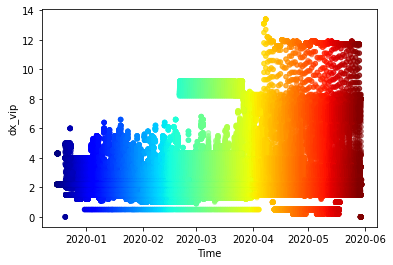

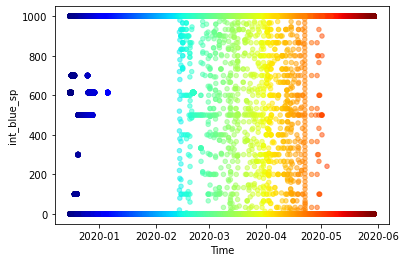

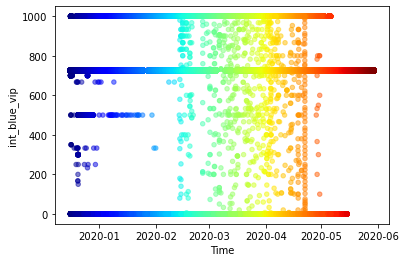

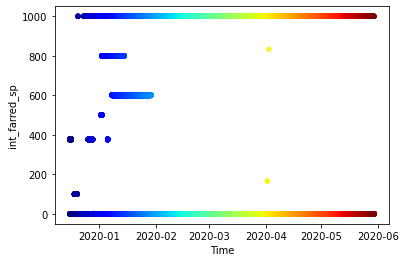

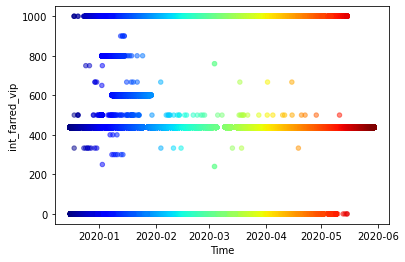

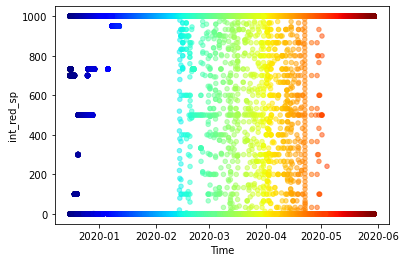

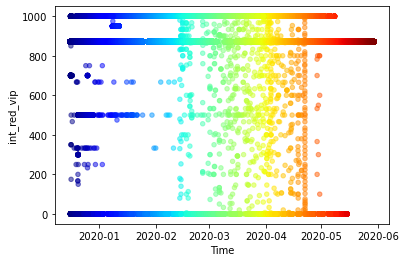

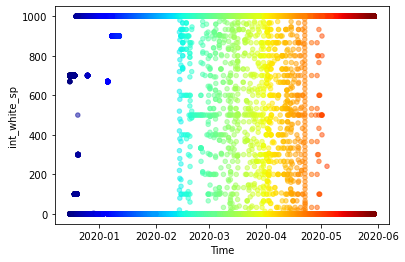

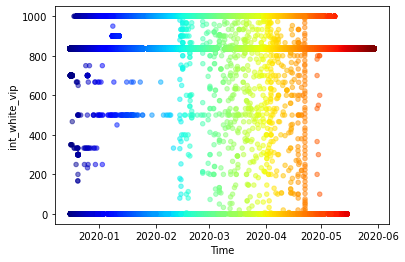

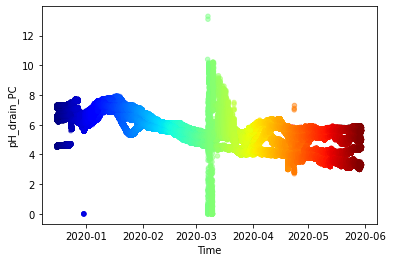

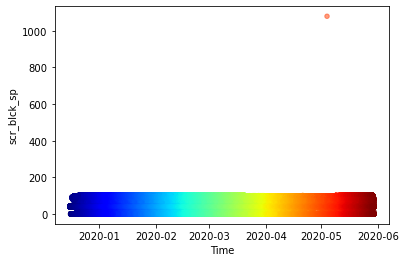

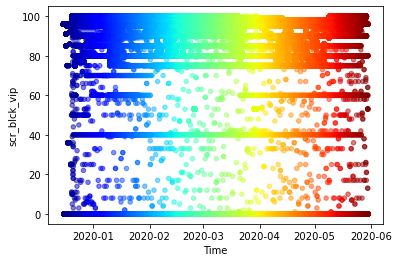

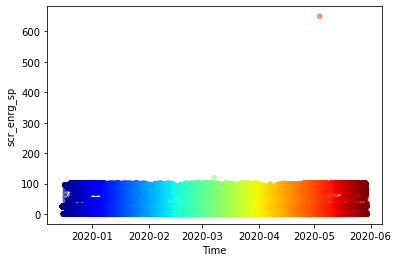

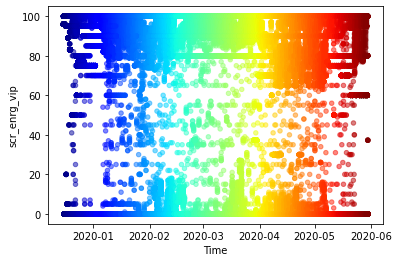

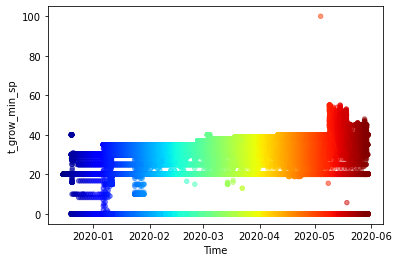

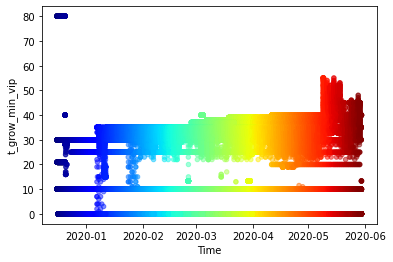

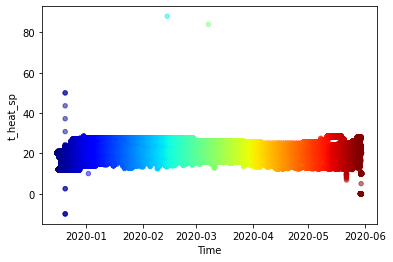

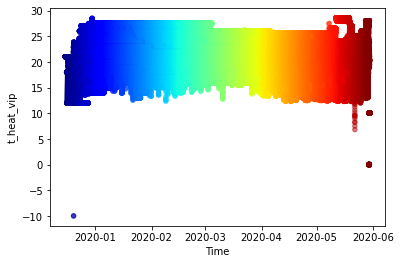

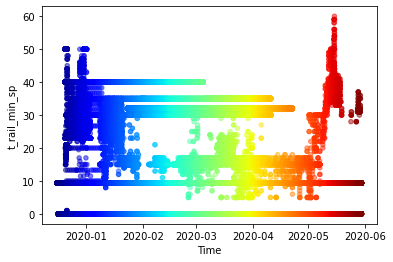

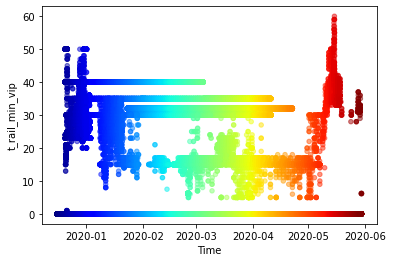

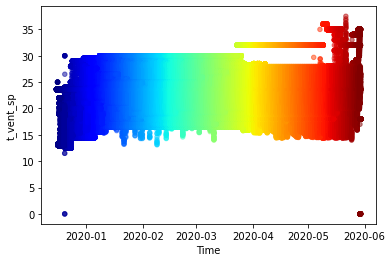

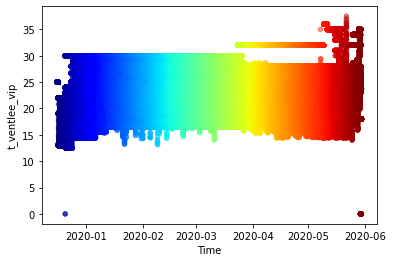

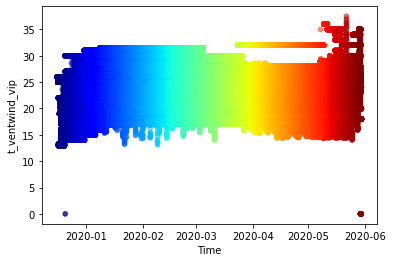

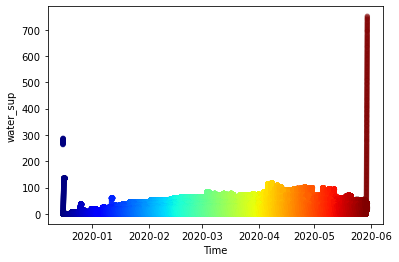

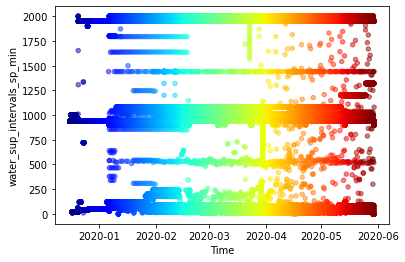

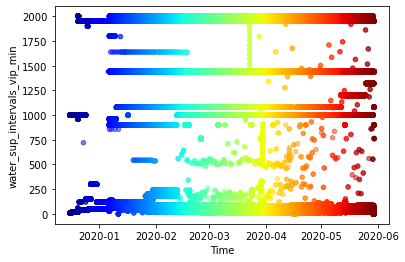

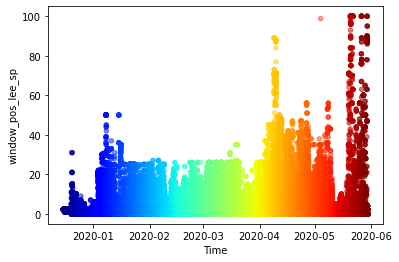

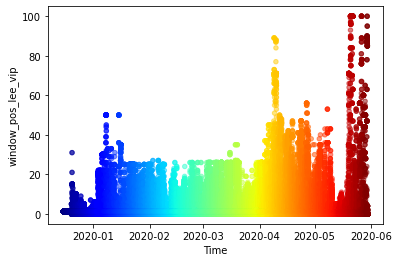

In [20]:
#scatter plot with respect to time 
columns=['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC','EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR','Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'assim_sp', 'assim_vip','co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp','int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp','int_red_vip', 'int_white_sp', 'int_white_vip', 'pH_drain_PC','scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip','t_grow_min_sp', 't_grow_min_vip', 't_heat_sp', 't_heat_vip','t_rail_min_sp', 't_rail_min_vip', 't_vent_sp', 't_ventlee_vip','t_ventwind_vip', 'water_sup', 'water_sup_intervals_sp_min','water_sup_intervals_vip_min', 'window_pos_lee_sp','window_pos_lee_vip']
for i in columns:
    greenhouseclimate.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))